<a href="https://colab.research.google.com/github/Suee18/Forecasting_Flights-DataScience/blob/main/notebooks/exploratory/flight_delay_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flights (3M) - Exploratory Data Analysis

## Contents
1. [ Data Loading](#setup)
2. [Data Overview](#overview)
3. [Handling Missing Values](#missing)
4. [Statistical Analysis](#statistics)
5. [Temporal Analysis](#temporal)
6. [Geographical Analysis](#geographical)
7. [Correlation Analysis](#correlation)
8. [Delay Pattern Exploration](#patterns)
9. [Summary and Findings](#summary)

## 1. Data Loading <a id='setup'></a>



In [35]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickzel/flight-delay-and-cancellation-dataset-2019-2023")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/flight-delay-and-cancellation-dataset-2019-2023


In [36]:
!git clone https://github.com/Suee18/Forecasting_Flights-DataScience

Cloning into 'Forecasting_Flights-DataScience'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 73 (delta 18), reused 64 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (73/73), 1.05 MiB | 2.80 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [37]:
import os
os.chdir("Forecasting_Flights-DataScience")  # Change to your repo folder name

In [38]:
import sys
sys.path.append("/content/Forecasting_Flights-DataScience")
sys.path.append("/content/Forecasting_Flights-DataScience/src")

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Add src directory to path for importing custom modules
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(PROJECT_ROOT)
from src.data import loader, processor
from src.visualization import exploratory_viz

In [40]:
# Ensure figures/3m subfolder exists
figures_3m_dir = os.path.join(os.path.abspath(os.path.join(os.getcwd(), '../..')), 'reports', 'figures', '3m')
os.makedirs(figures_3m_dir, exist_ok=True)
print(f"Figures will be saved to: {figures_3m_dir}")

Figures will be saved to: /content/reports/figures/3m


In [41]:
import os
import matplotlib.pyplot as plt

# Override the default subfolder parameter for all visualizations
# This will ensure all figures go to the 3m subfolder
original_save_fig = exploratory_viz.save_fig

# Create a custom save_fig function that saves to the 3m subfolder
# This approach bypasses the original function entirely to avoid parameter issues
def custom_save_fig(fig, filename, reports_dir=None, dpi=300, bbox_inches='tight'):
    # Try to determine project root
    current_dir = os.getcwd()
    if 'notebooks' in current_dir:
        # Going up from notebooks directory
        project_root = os.path.abspath(os.path.join(current_dir, '../..'))
    else:
        project_root = os.path.abspath(os.path.join(current_dir, '..'))

    # Define reports directory with 3m subfolder
    if reports_dir is None:
        reports_dir = os.path.join(project_root, 'reports', 'figures', '3m')

    # Create the directory if it doesn't exist
    os.makedirs(reports_dir, exist_ok=True)

    # Save the figure
    fig_path = os.path.join(reports_dir, filename)
    fig.savefig(fig_path, dpi=dpi, bbox_inches=bbox_inches)
    plt.close(fig)

    print(f"Figure saved to {fig_path}")

# Replace the original save_fig function with our custom implementation
exploratory_viz.save_fig = custom_save_fig

print("Visualization output redirected to figures/3m/")

Visualization output redirected to figures/3m/


In [42]:
!pip install kagglehub

In [43]:
import os

# Path to the dataset directory
dataset_dir = "/kaggle/input/flight-delay-and-cancellation-dataset-2019-2023"

# List files to find your CSV
print(os.listdir(dataset_dir))  # Check the exact filename

# Example: If the file is named "flights_sample_3m.csv"
file_path = os.path.join(dataset_dir, "flights_sample_3m.csv")

# Now load the data
loader.peek_data(file_path, nrows=5)

['flights_sample_3m.csv', 'dictionary.html']


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


## 2. Data Overview <a id='overview'></a>




In [44]:
overview = loader.get_data_overview(file_path)
print(f"Dataset dimensions: {overview['rows']} rows × {overview['columns']} columns")

overview['column_info']

Dataset dimensions: 3000000 rows × 32 columns


,dtype,sample_values
FL_DATE,object,"['2021-08-10', '2019-05-17', '2019-05-03']"
AIRLINE,object,"['American Airlines Inc.', 'United Air Lines I..."
AIRLINE_DOT,object,"['Envoy Air: MQ', 'SkyWest Airlines Inc.: OO',..."
AIRLINE_CODE,object,"['B6', 'MQ', 'OO']"
DOT_CODE,int64,"[19393, 19393, 19977]"
FL_NUMBER,int64,"[4114, 1960, 290]"
ORIGIN,object,"['AZO', 'PHX', 'OKC']"
ORIGIN_CITY,object,"['Detroit, MI', 'Tampa, FL', 'New York, NY']"
DEST,object,"['OKC', 'PDX', 'DEN']"
DEST_CITY,object,"['Huntsville, AL', 'Houston, TX', 'Sarasota/Br..."


### Numerical cols

In [45]:
numeric_stats = loader.get_numeric_stats(file_path)
numeric_stats

,count,mean,std,min,max,25%,50%,75%
DOT_CODE,3000000.0,19976.294095,377.284556,19393.0,20452.0,19790.0,19930.0,20368.0
FL_NUMBER,3000000.0,2511.535519,1747.257748,1.0,9562.0,1051.0,2158.0,3801.0
CRS_DEP_TIME,3000000.0,1327.061984,485.878773,1.0,2359.0,915.0,1320.0,1730.0
DEP_TIME,2922385.0,1329.775913,499.309966,1.0,2400.0,916.0,1323.0,1739.0
DEP_DELAY,2922356.0,10.123326,49.251826,-90.0,2966.0,-6.0,-2.0,6.0
TAXI_OUT,2921194.0,16.643046,9.192900,1.0,184.0,11.0,14.0,19.0
WHEELS_OFF,2921194.0,1352.360989,500.872602,1.0,2400.0,932.0,1336.0,1752.0
WHEELS_ON,2920056.0,1462.499569,527.236728,1.0,2400.0,1049.0,1501.0,1908.0
TAXI_IN,2920056.0,7.678982,6.269638,1.0,249.0,4.0,6.0,9.0
CRS_ARR_TIME,3000000.0,1490.560665,511.547481,1.0,2400.0,1107.0,1517.0,1919.0


### Categorical cols

In [46]:
categorical_stats = loader.get_categorical_stats(file_path)

for col in categorical_stats.keys():
    print(f"\nTop categories for {col}:")
    print(categorical_stats[col].head(10))


Top categories for FL_DATE:
FL_DATE
2019-07-16    2332.0
2019-07-18    2313.0
2020-03-18    2310.0
2019-08-15    2308.0
2020-03-13    2295.0
2019-07-17    2294.0
2019-06-14    2268.0
2019-10-18    2260.0
2020-03-16    2255.0
2019-06-10    2253.0
dtype: float64

Top categories for AIRLINE:
AIRLINE
Southwest Airlines Co.    576470.0
Delta Air Lines Inc.      395239.0
American Airlines Inc.    383106.0
SkyWest Airlines Inc.     343737.0
United Air Lines Inc.     254504.0
Republic Airline          143107.0
Envoy Air                 121256.0
JetBlue Airways           112844.0
Endeavor Air Inc.         112463.0
PSA Airlines Inc.         107050.0
dtype: float64

Top categories for AIRLINE_DOT:
AIRLINE_DOT
Southwest Airlines Co.: WN    576470.0
Delta Air Lines Inc.: DL      395239.0
American Airlines Inc.: AA    383106.0
SkyWest Airlines Inc.: OO     343737.0
United Air Lines Inc.: UA     254504.0
Republic Airline: YX          143107.0
Envoy Air: MQ                 121256.0
JetBlue Airways: B

## 3. Missing Values <a id='missing'></a>



Figure saved to /content/Forecasting_Flights-DataScience/reports/figures/3m/missing_values.png


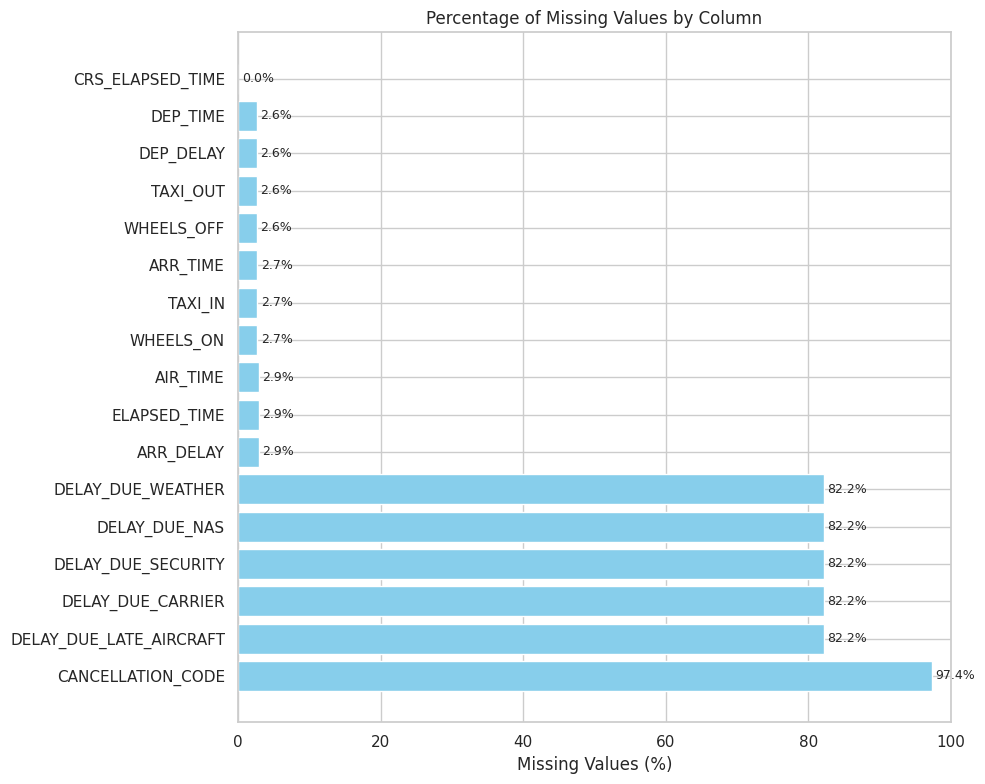

In [47]:
missing_data = processor.analyze_missing_values(file_path)

# Plot missing values
exploratory_viz.plot_missing_values(missing_data)

## 4. Statistical Analysis <a id='statistics'></a>


In [57]:
# Analyze delay statistics
delay_stats = processor.analyze_delays(file_path)

# Plot delay distributions
exploratory_viz.plot_delay_distributions(delay_stats)

# Either:
plt.show()



Figure saved to /content/Forecasting_Flights-DataScience/reports/figures/3m/delay_distributions.png


In [49]:
# Calculate and display delay frequency by different metrics
delay_freq = processor.calculate_delay_frequency(file_path)
print("Delay frequency analysis:")
delay_freq

Delay frequency analysis:


{'overall_delay_rate': np.float64(0.171763),
 'carrier_delay_rates': JetBlue Airways                       0.254989
 Frontier Airlines Inc.                0.252164
 Allegiant Air                         0.240434
 Spirit Air Lines                      0.208712
 ExpressJet Airlines LLC d/b/a aha!    0.195839
 American Airlines Inc.                0.186531
 United Air Lines Inc.                 0.180826
 Southwest Airlines Co.                0.178922
 Mesa Airlines Inc.                    0.173599
 Alaska Airlines Inc.                  0.170016
 Envoy Air                             0.161947
 PSA Airlines Inc.                     0.161887
 Hawaiian Airlines Inc.                0.152831
 SkyWest Airlines Inc.                 0.149568
 Republic Airline                      0.147582
 Delta Air Lines Inc.                  0.136158
 Horizon Air                           0.135262
 Endeavor Air Inc.                     0.123249
 dtype: float64,
 'origin_delay_rates': CDB    0.500000
 PPG    0.41

## 5. Temporal Analysis <a id='temporal'></a>

Analyze how delays vary over different time periods (hour of day, day of week, month, seasons)

Figure saved to /content/Forecasting_Flights-DataScience/reports/figures/3m/hourly_patterns.png
Figure saved to /content/Forecasting_Flights-DataScience/reports/figures/3m/daily_patterns.png
Figure saved to /content/Forecasting_Flights-DataScience/reports/figures/3m/monthly_patterns.png


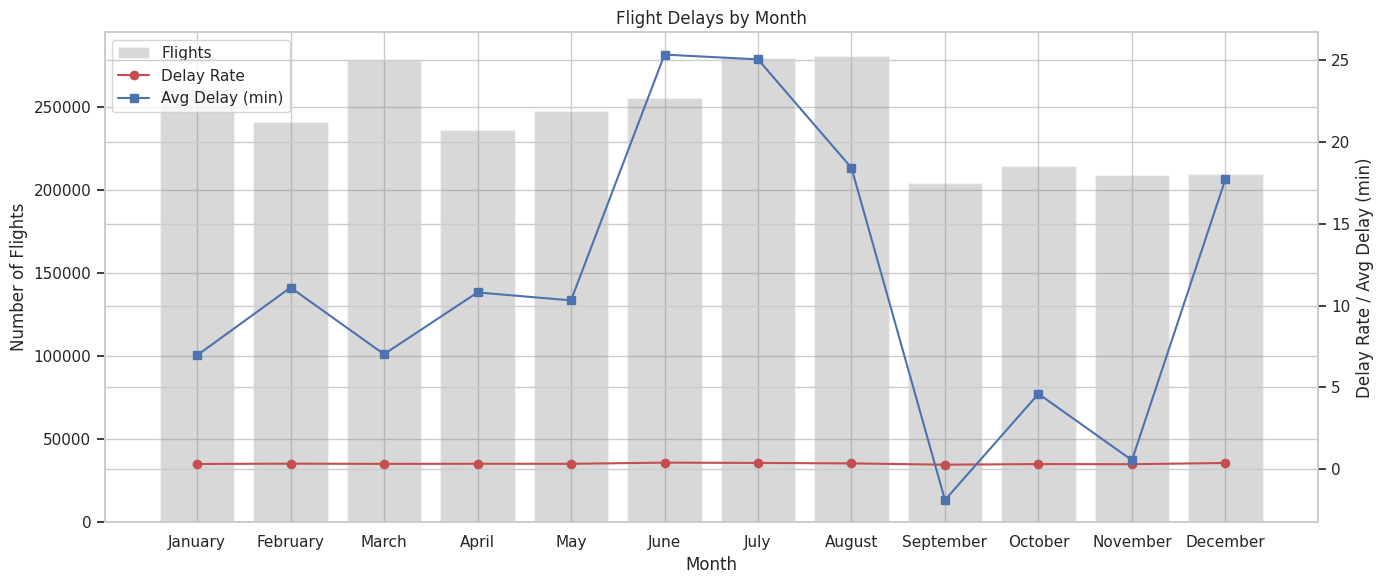

In [50]:
# Analyze patterns of delays "all delays"
temporal_patterns = processor.analyze_temporal_patterns(file_path)

# Visualize hourly patterns
exploratory_viz.plot_hourly_patterns(temporal_patterns['hourly'])

# Visualize daily patterns
exploratory_viz.plot_daily_patterns(temporal_patterns['daily'])

# Visualize monthly patterns
exploratory_viz.plot_monthly_patterns(temporal_patterns['monthly'])

Departure delay only



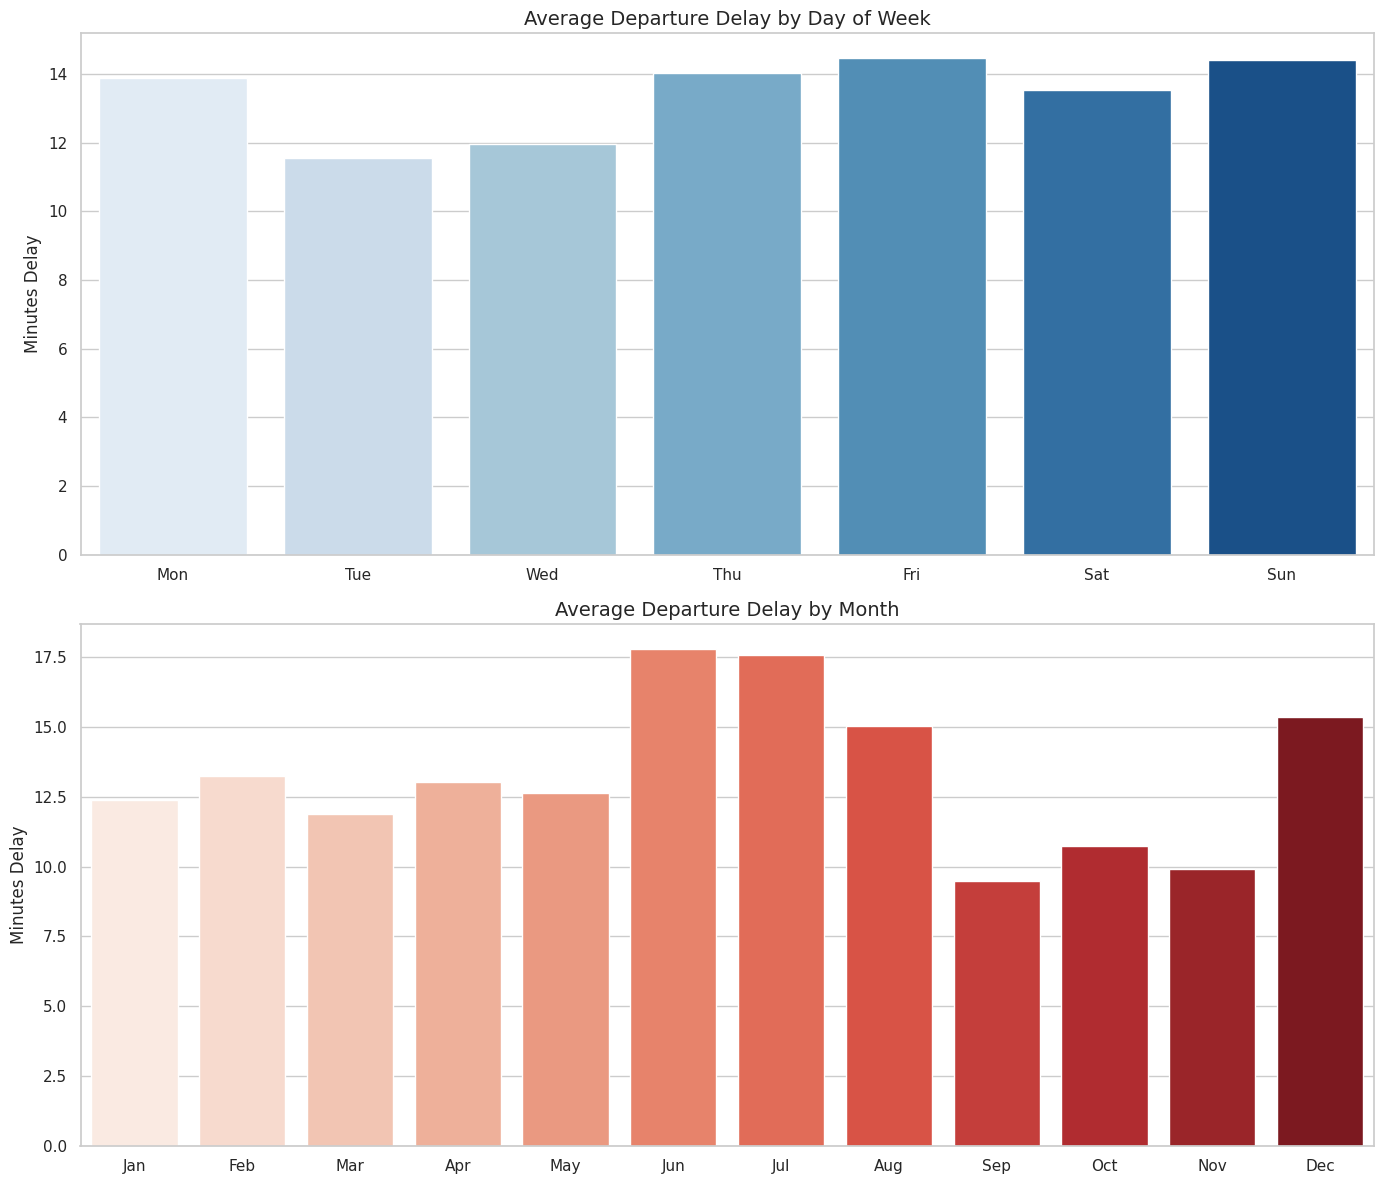

In [60]:

df = pd.read_csv(file_path)

#  DEP_DELAY
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df = df[df['DEP_DELAY'].notna()]  # Remove missing delays
df['DEP_DELAY'] = df['DEP_DELAY'].clip(lower=0)  # Remove negative delays (early arrivals)

daily_dep_delays = df.groupby(df['FL_DATE'].dt.dayofweek)['DEP_DELAY'].mean()
monthly_dep_delays = df.groupby(df['FL_DATE'].dt.month)['DEP_DELAY'].mean()

# Visualization
def plot_dep_delay_patterns(daily, monthly):
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))

    # Daily
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    sns.barplot(x=daily.index, y=daily.values, ax=axes[0], palette='Blues')
    axes[0].set_title('Average Departure Delay by Day of Week', fontsize=14)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Minutes Delay', fontsize=12)
    axes[0].set_xticklabels(days)

    # Monthly
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.barplot(x=monthly.index, y=monthly.values, ax=axes[1], palette='Reds')
    axes[1].set_title('Average Departure Delay by Month', fontsize=14)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('Minutes Delay', fontsize=12)
    axes[1].set_xticklabels(months)

    plt.tight_layout()
    plt.show()

plot_dep_delay_patterns(daily_dep_delays, monthly_dep_delays)

In [61]:
# Additional stats
print(f"\nDeparture Delay Analysis (n={len(df):,})")
print(f"Mean delay: {df['DEP_DELAY'].mean():.1f} mins")
print(f"Median delay: {df['DEP_DELAY'].median():.1f} mins")
print(f"Flights >15min delayed: {(df['DEP_DELAY']>15).mean()*100:.1f}%")


Departure Delay Analysis (n=2,922,356)
Mean delay: 13.4 mins
Median delay: 0.0 mins
Flights >15min delayed: 17.6%


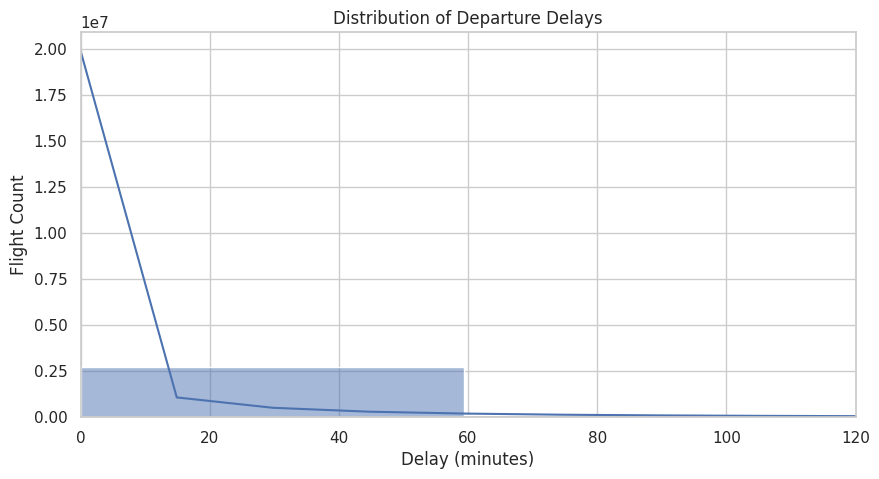

In [62]:
plt.figure(figsize=(10,5))
sns.histplot(df['DEP_DELAY'], bins=50, kde=True)
plt.xlim(0, 120)  # Focus on 0-2 hour delays
plt.title('Distribution of Departure Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Flight Count')
plt.show()

## 6. Geographical Analysis <a id='geographical'></a>

Analyze how delays vary by airports and routes.

Figure saved to /content/Forecasting_Flights-DataScience/reports/figures/3m/airport_delays.png


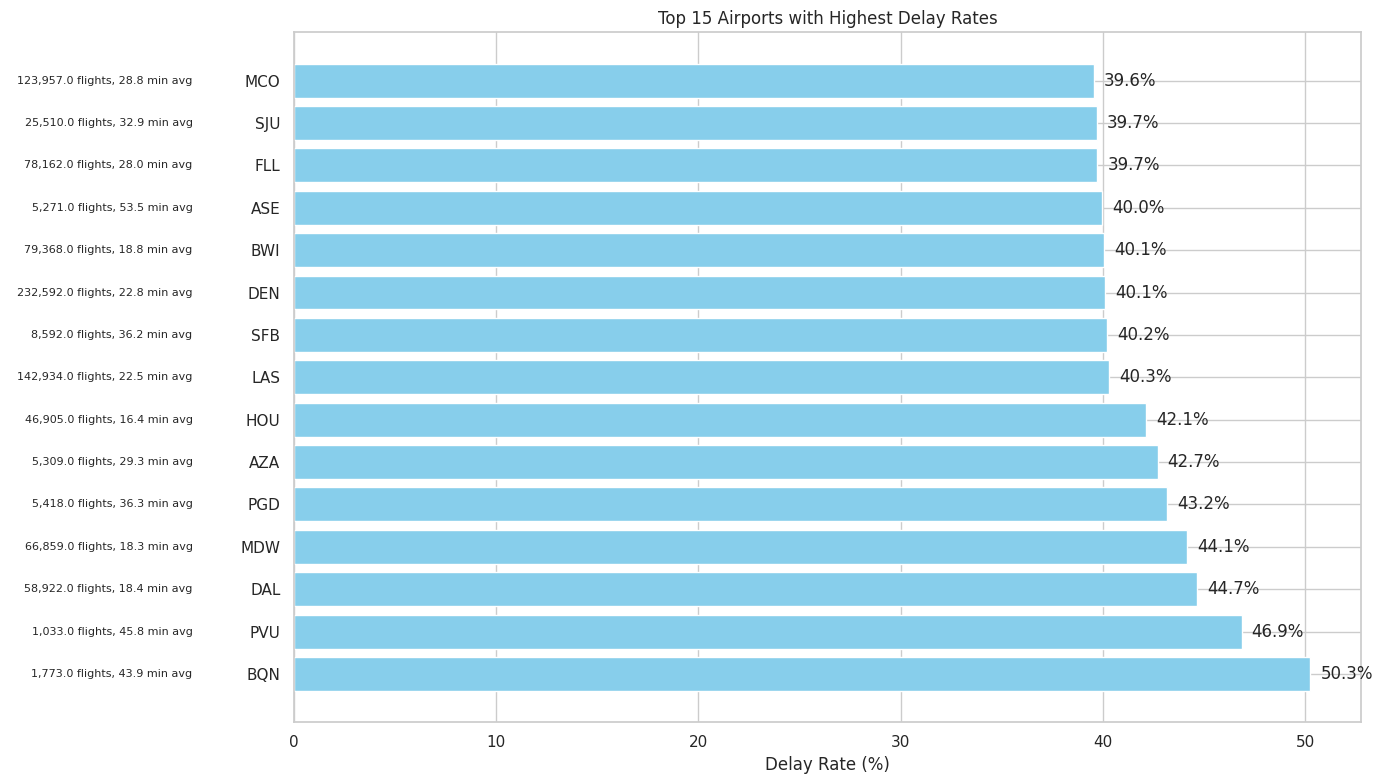

In [51]:
# Analyze geographic patterns of delays
geo_patterns = processor.analyze_geographic_patterns(file_path)

# Plot airports with highest delay frequencies
exploratory_viz.plot_airport_delays(geo_patterns['airports'], top_n=15)

departure delay by origin city

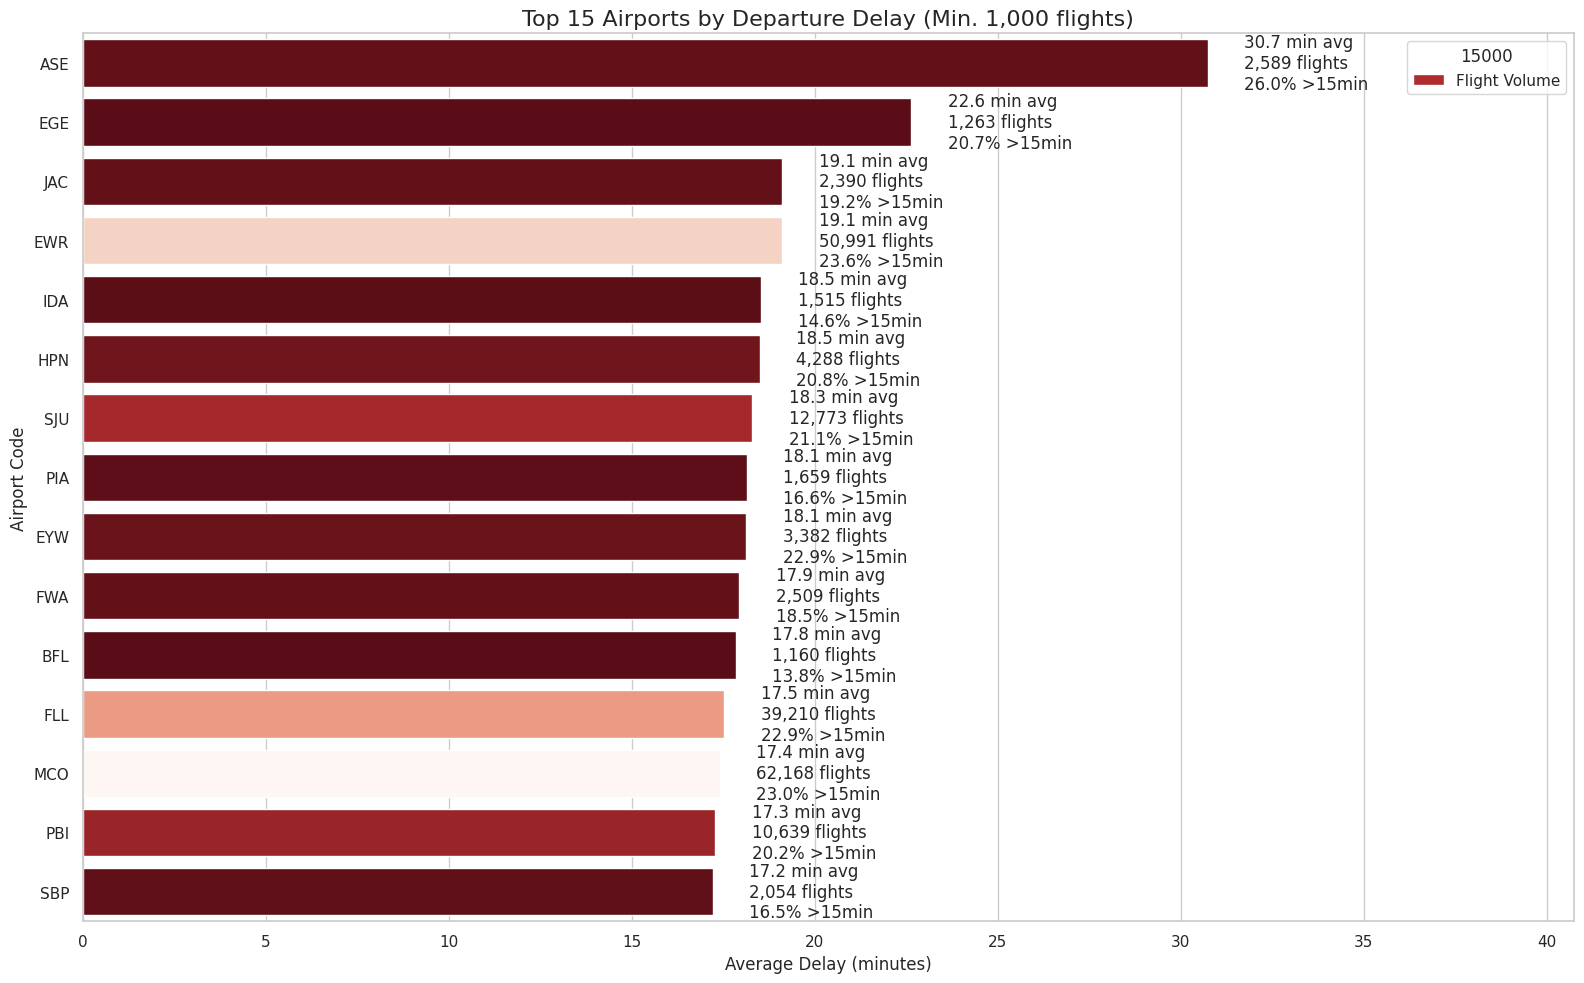

In [68]:

df = df[['ORIGIN', 'ORIGIN_CITY', 'DEP_DELAY']].dropna()
df['DEP_DELAY'] = df['DEP_DELAY'].clip(lower=0)
df['is_delayed'] = df['DEP_DELAY'] > 15  # Industry standard delay threshold

# 1. Analyze by Origin Airport
airport_stats = (
    df.groupby(['ORIGIN', 'ORIGIN_CITY'])
    .agg(
        avg_delay=('DEP_DELAY', 'mean'),
        total_flights=('DEP_DELAY', 'count'),
        delayed_flights=('is_delayed', 'sum')
    )
    .assign(delay_pct=lambda x: (x['delayed_flights']/x['total_flights'])*100)
    .sort_values('avg_delay', ascending=False)
    .reset_index()
)

# 2. Plot Top 15 Airports
plt.figure(figsize=(16, 10))
top_airports = airport_stats[airport_stats['total_flights'] > 1000].head(15)

ax = sns.barplot(
    x='avg_delay',
    y='ORIGIN',
    data=top_airports,
    palette='Reds_r',
    hue='total_flights',
    dodge=False
)

# Custom annotations
for i, row in enumerate(top_airports.itertuples()):
    text = f"{row.avg_delay:.1f} min avg\n{row.total_flights:,} flights\n{row.delay_pct:.1f}% >15min"
    ax.text(row.avg_delay + 1, i, text, va='center')

# Plot formatting
plt.title('Top 15 Airports by Departure Delay (Min. 1,000 flights)', fontsize=16)
plt.xlabel('Average Delay (minutes)', fontsize=12)
plt.ylabel('Airport Code', fontsize=12)
plt.xlim(0, top_airports['avg_delay'].max() + 10)

# Add legend for flight volume
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Flight Volume'], title=labels[0])

plt.tight_layout()
plt.show()


In [64]:
print(f"\nGeographic Delay Analysis (n={len(df):,} flights)")
print(f"Worst airport: {top_airports.iloc[0]['ORIGIN']} ({top_airports.iloc[0]['ORIGIN_CITY']})")
print(f"Average delay at worst airport: {top_airports.iloc[0]['mean']:.1f} minutes")
print(f"National average: {df['DEP_DELAY'].mean():.1f} minutes")


Geographic Delay Analysis (n=2,922,356 flights)
Worst airport: ASE (Aspen, CO)
Average delay at worst airport: 30.7 minutes
National average: 13.4 minutes


Figure saved to /content/Forecasting_Flights-DataScience/reports/figures/3m/route_delays.png


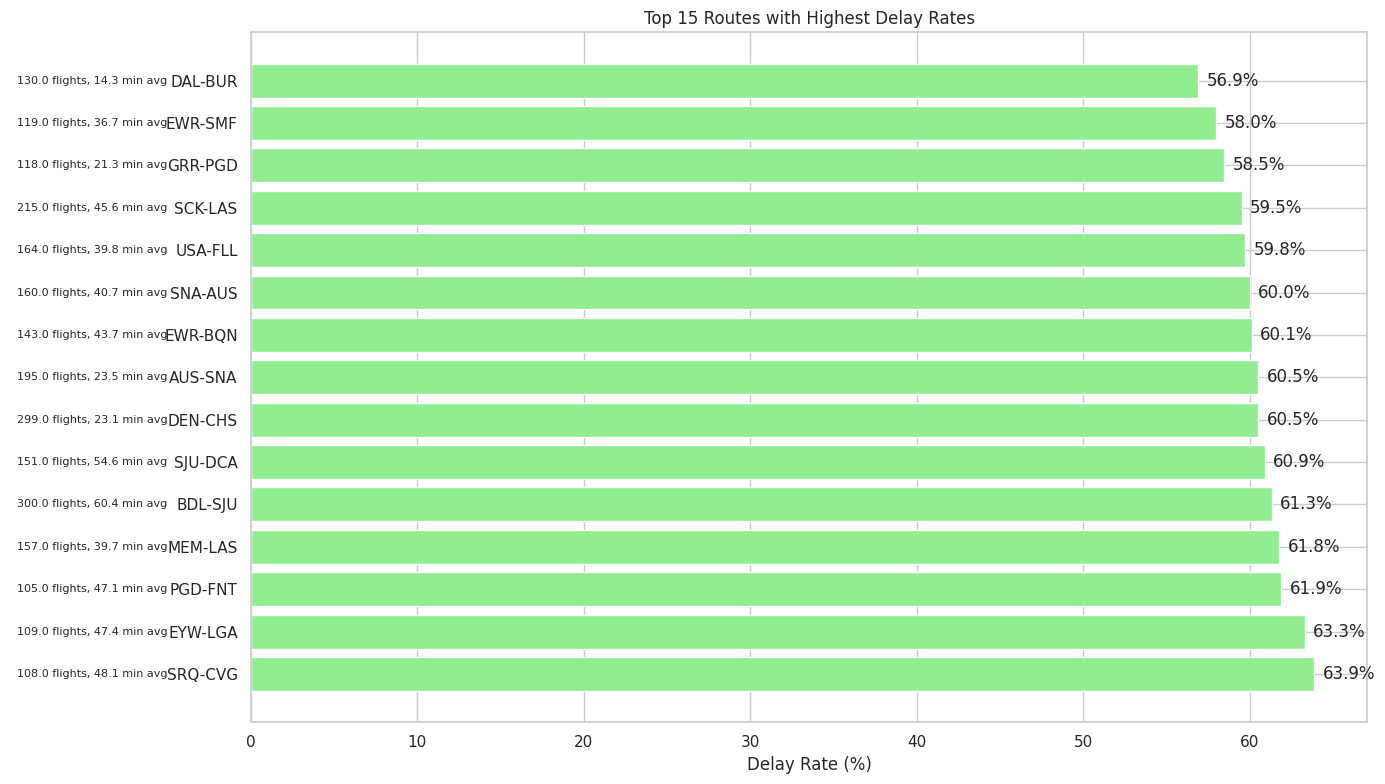

In [52]:
# Plot routes with highest delay frequencies
exploratory_viz.plot_route_delays(geo_patterns['routes'], top_n=15)

## 7. Correlation Analysis <a id='correlation'></a>


Figure saved to /content/Forecasting_Flights-DataScience/reports/figures/3m/correlation_heatmap.png


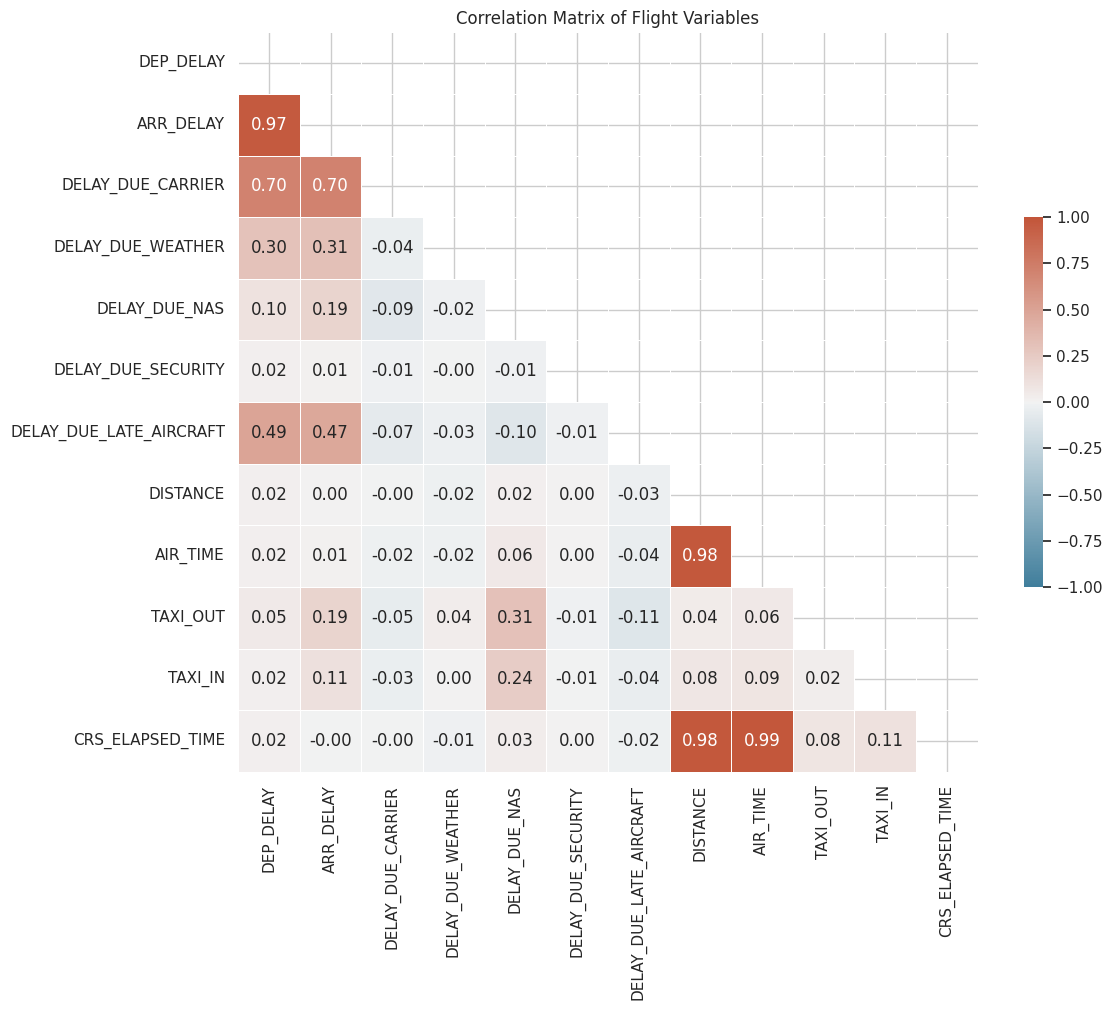

<Figure size 1200x1000 with 0 Axes>

In [53]:
# Calculate correlations between numeric variables
correlations = processor.calculate_correlations(file_path)
exploratory_viz.plot_correlation_heatmap(correlations)

## 8. Delay Pattern Exploration <a id='patterns'></a>


Figure saved to /content/Forecasting_Flights-DataScience/reports/figures/3m/carrier_delays.png


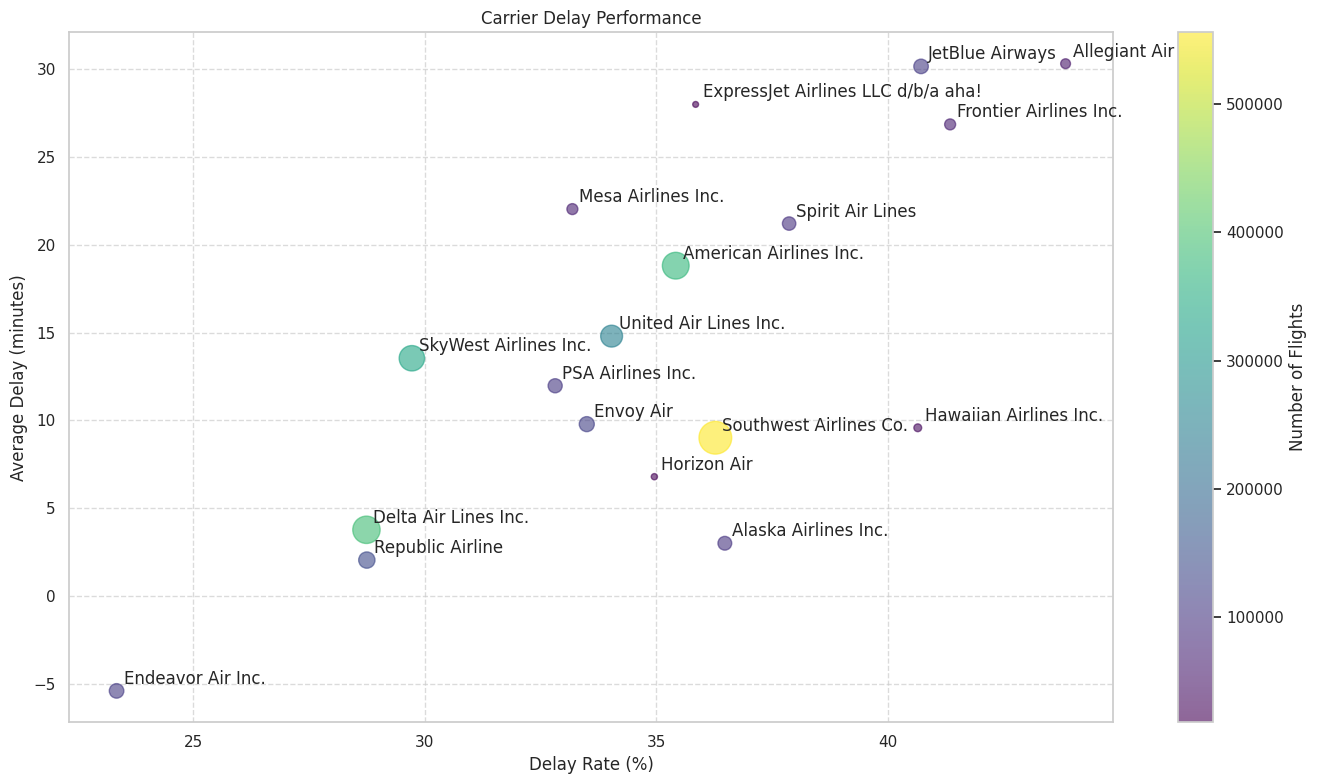

In [54]:
# Analyze delay patterns by airline carrier
carrier_delays = processor.analyze_carrier_delays(file_path)
exploratory_viz.plot_carrier_delays(carrier_delays)

Figure saved to /content/Forecasting_Flights-DataScience/reports/figures/3m/distance_vs_delay.png


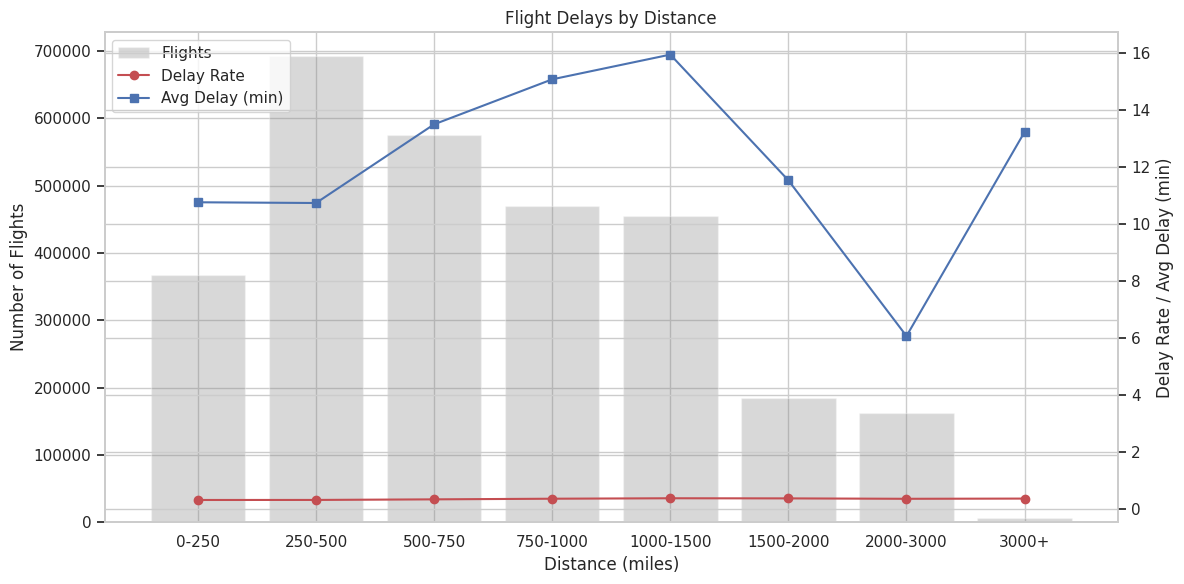

In [55]:
# Analyze how flight distance affects delays
distance_delay = processor.analyze_distance_vs_delay(file_path)
exploratory_viz.plot_distance_vs_delay(distance_delay)

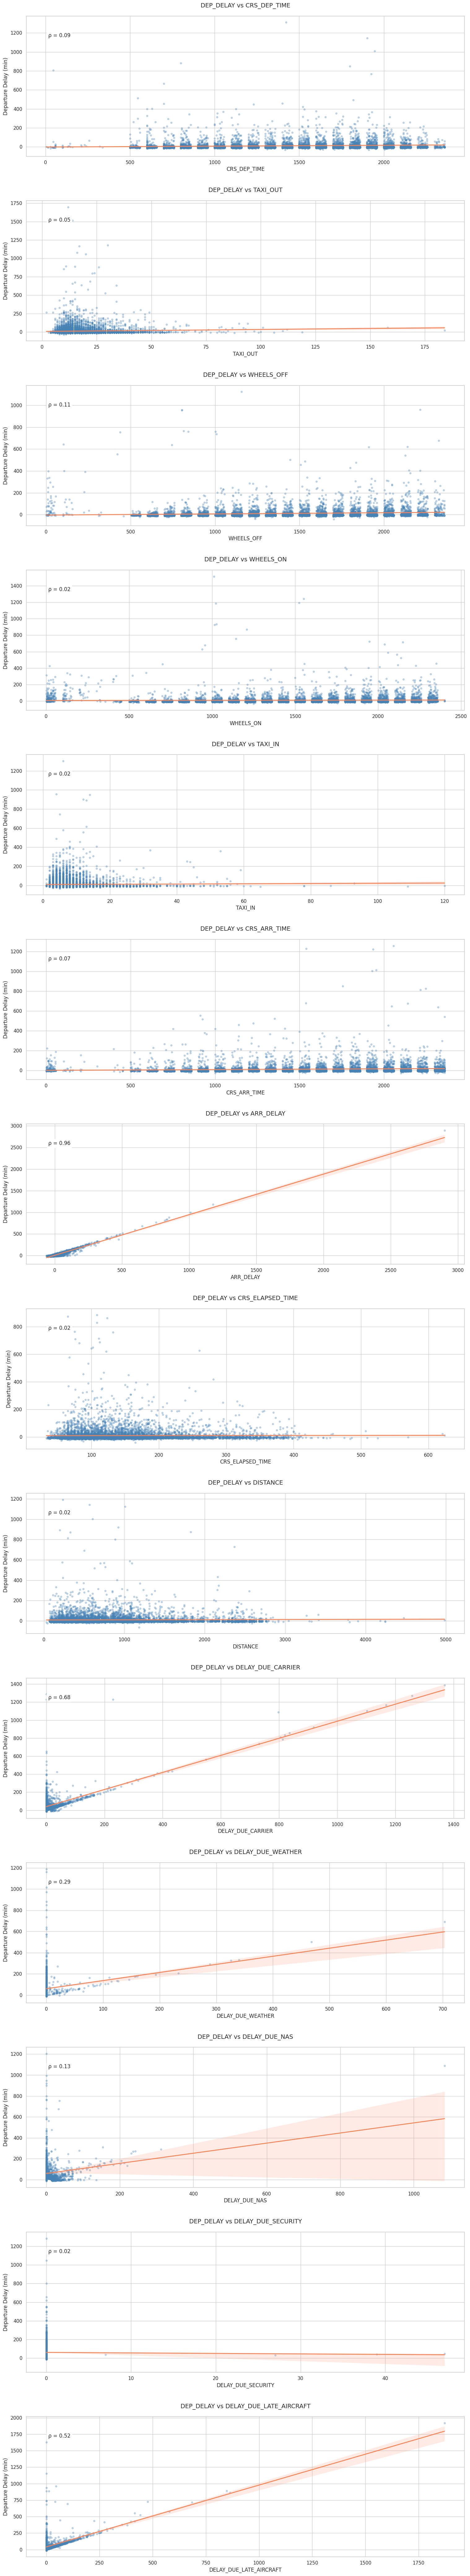

In [74]:
df = pd.read_csv(file_path)

df = df[['DEP_DELAY', 'DISTANCE']].dropna()  # Focus on departure delay and distance
df['DEP_DELAY'] = df['DEP_DELAY'].clip(lower=0)  # Remove negative delays (early departures)

# Create distance bins
df['distance_bin'] = pd.cut(df['DISTANCE'],
                           bins=[0, 500, 1000, 1500, 2000, 2500, 3000, np.inf],
                           labels=['<500', '500-1k', '1k-1.5k', '1.5k-2k', '2k-2.5k', '2.5k-3k', '3k+'])

# Calculate statistics
distance_stats = df.groupby('distance_bin').agg(
    avg_delay=('DEP_DELAY', 'mean'),
    median_delay=('DEP_DELAY', 'median'),
    flights_count=('DEP_DELAY', 'count'),
    delay_percentage=('DEP_DELAY', lambda x: (x > 15).mean() * 100)
).reset_index()

# Create visualization
plt.figure(figsize=(15, 9))

# Plot 1: Average Delay by Distance
plt.subplot(2, 1, 1)
sns.barplot(x='distance_bin', y='avg_delay', data=distance_stats, palette='Blues')
plt.title('Average Departure Delay by Flight Distance', fontsize=14)
plt.xlabel('Flight Distance (miles)')
plt.ylabel('Average Delay (minutes)')

# Add value labels
for i, row in distance_stats.iterrows():
    plt.text(i, row['avg_delay'] + 1, f"{row['avg_delay']:.1f}", ha='center')

# Plot 2: Percentage of Delayed Flights (>15 min)
plt.subplot(2, 1, 2)
sns.barplot(x='distance_bin', y='delay_percentage', data=distance_stats, palette='Reds')
plt.title('Percentage of Flights with >15 min Departure Delay', fontsize=14)
plt.xlabel('Flight Distance (miles)')
plt.ylabel('Percentage (%)')

# Add value labels
for i, row in distance_stats.iterrows():
    plt.text(i, row['delay_percentage'] + 1, f"{row['delay_percentage']:.1f}%", ha='center')

plt.tight_layout()
plt.show()


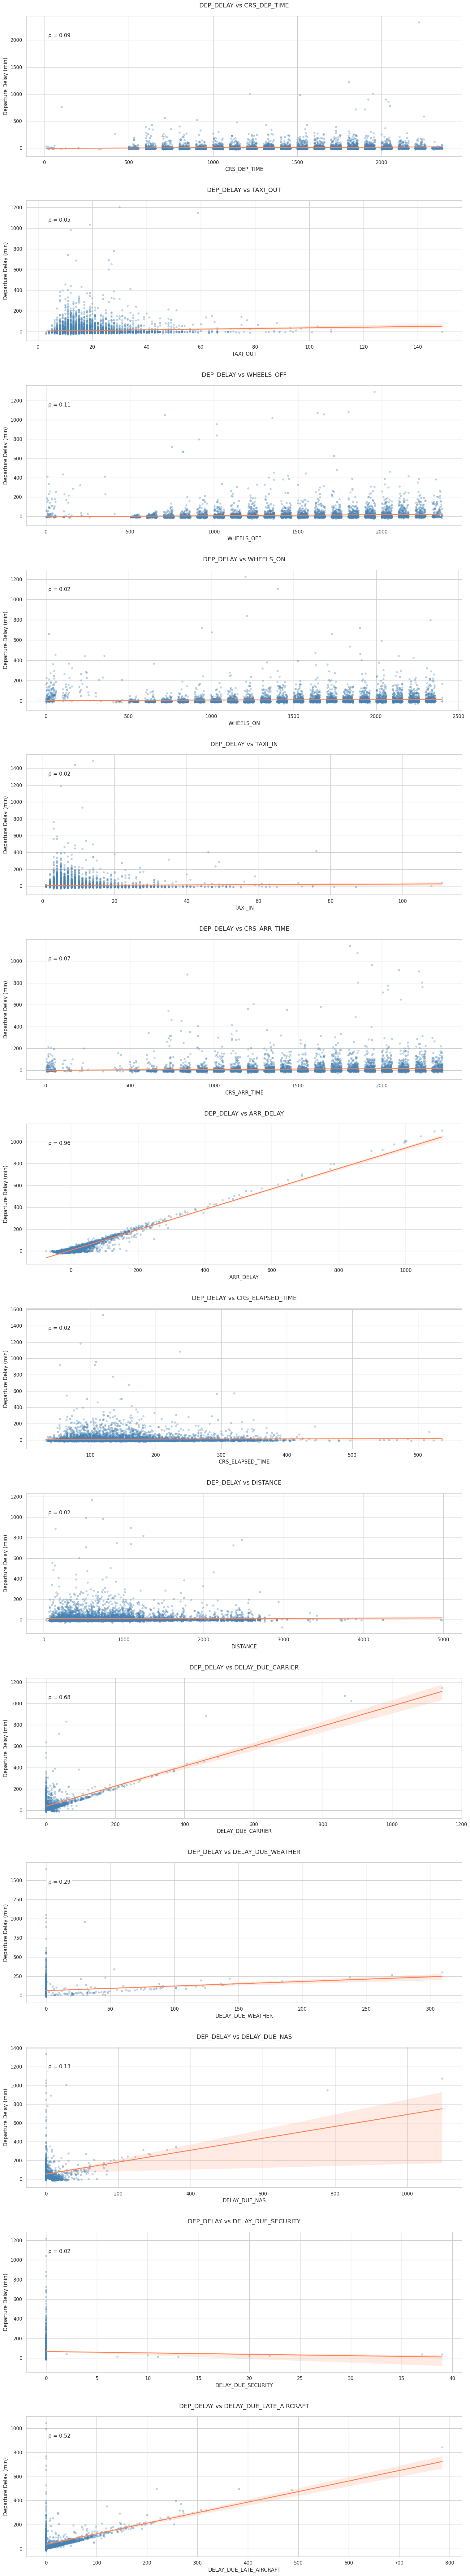

In [75]:
# Set up the plot grid
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(16, 6*len(numeric_cols)))

# Create individual regression plots
for i, col in enumerate(numeric_cols):
    sns.regplot(
        data=df.sample(10000),
        x=col,
        y='DEP_DELAY',
        ax=axes[i],
        scatter_kws={'alpha': 0.3, 's': 15, 'color': 'steelblue'},
        line_kws={'color': 'coral', 'linewidth': 2}
    )
    axes[i].set_title(f'DEP_DELAY vs {col}', pad=20, fontsize=14)
    axes[i].set_ylabel('Departure Delay (min)', fontsize=12)

    # Add correlation coefficient
    corr = df[[col, 'DEP_DELAY']].corr().iloc[0,1]
    axes[i].annotate(f'ρ = {corr:.2f}', xy=(0.05, 0.85),
                    xycoords='axes fraction', fontsize=12,
                    bbox=dict(boxstyle='round', fc='white'))

plt.tight_layout(pad=3.0)
plt.show()

## 9. Summary and Findings <a id='summary'></a>


In [56]:
insights = {
    'delay_rate': delay_freq['overall_delay_rate'],
    'worst_month': temporal_patterns['monthly'].sort_values('avg_delay', ascending=False).index[0],
    'worst_day': temporal_patterns['daily'].sort_values('avg_delay', ascending=False).index[0],
    'worst_hour': temporal_patterns['hourly'].sort_values('avg_delay', ascending=False).index[0],
    'worst_airport': geo_patterns['airports'].sort_values('avg_delay', ascending=False).index[0],
    'worst_route': geo_patterns['routes'].sort_values('avg_delay', ascending=False).index[0],
    'worst_carrier': carrier_delays.sort_values('avg_delay', ascending=False).index[0],
    'top_correlations': correlations.unstack().sort_values(ascending=False).drop_duplicates().iloc[1:6]
}

# Save insights to a report file
report_path = os.path.join(PROJECT_ROOT, 'reports', 'documents', 'flight_delay_eda_summary.md')
processor.save_insights_report(insights, report_path)

Report saved to /content/reports/documents/flight_delay_eda_summary.md
